
Using a Movie Revenue Dataset to find out if there exists any correlation between the Gross Revenue a movie earrns during it's lifetime and other parameters defined in the dataset


In [18]:
#Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#Reading in the data
df = pd.read_csv(r'C:\Users\acer\Downloads\movies.csv')

In [19]:
#Taking a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0



We want to find if there exists any correlation between the gross revenue collected by the movie and other parameters included in this dataset. 

First, we start by finding and removing any missing values and then cleaning and modelling the data for our use


In [20]:
#Checking if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [21]:
#Dropping missing value rows as we need budget and gross to find our correlation 

df = df.dropna()

#Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [22]:
#Cleaning and standardising data

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['release_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [23]:
# Ordering data by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: >

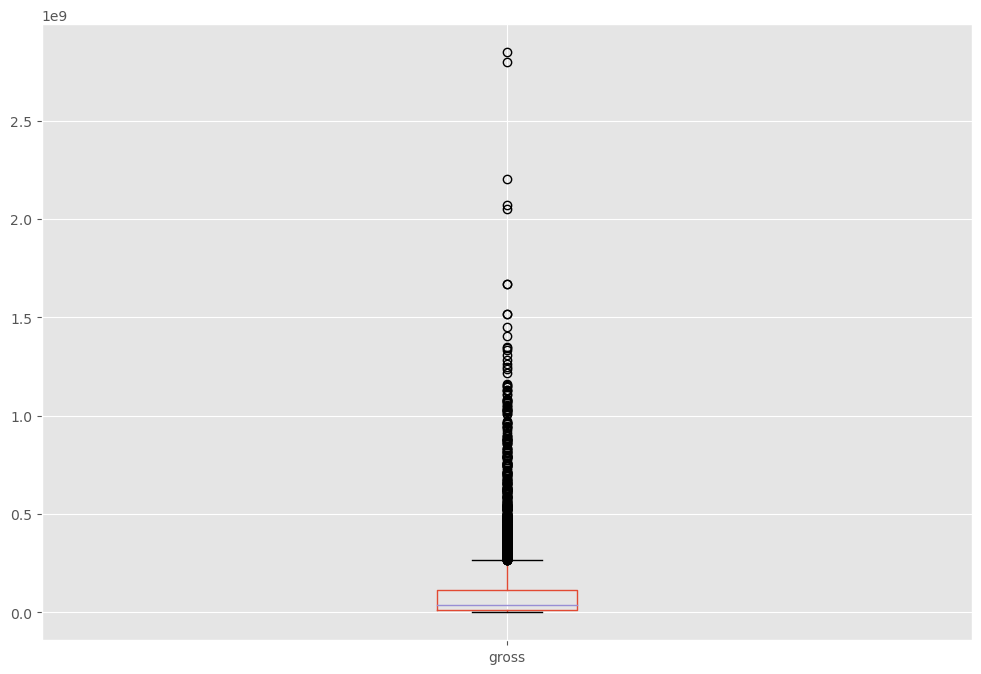

In [9]:
#Checking for the outliers in the gross revenue column

df.boxplot(column=['gross'])


Now, after going through the data we can see the highest grossing movies between 1986 to 2016

Parsing through the data, one can assume that the following correlations will exist

1. Gross Revenue is highly correlated to Movie Budget
This means that the higher the budget of the movie is, the more it will end up earning at the box office

2. Gross Revenue is Highly Correlated to Production company
This means that the bigger the production company the more high revenue earners it will have and vice versa

It can be assumed that these relationships exist in the dataset. However, to confirm or deny the existence and quantify the strength of these relationships, we will calculate the actual correlation. 

In [12]:
#Finding Distinct Values of movie companies

df['company'].drop_duplicates().sort_values(ascending=False)
df['company']

0                              Warner Bros.
1                         Columbia Pictures
2                                 Lucasfilm
3                        Paramount Pictures
4                            Orion Pictures
                       ...                 
7648                      Columbia Pictures
7649                     Paramount Pictures
7650                     Universal Pictures
7651                   20th Century Studios
7652    Beijing Diqi Yinxiang Entertainment
Name: company, Length: 5421, dtype: object

Plotting Gross Revenue vs Movie Budget to find correlation

<function matplotlib.pyplot.show(close=None, block=None)>

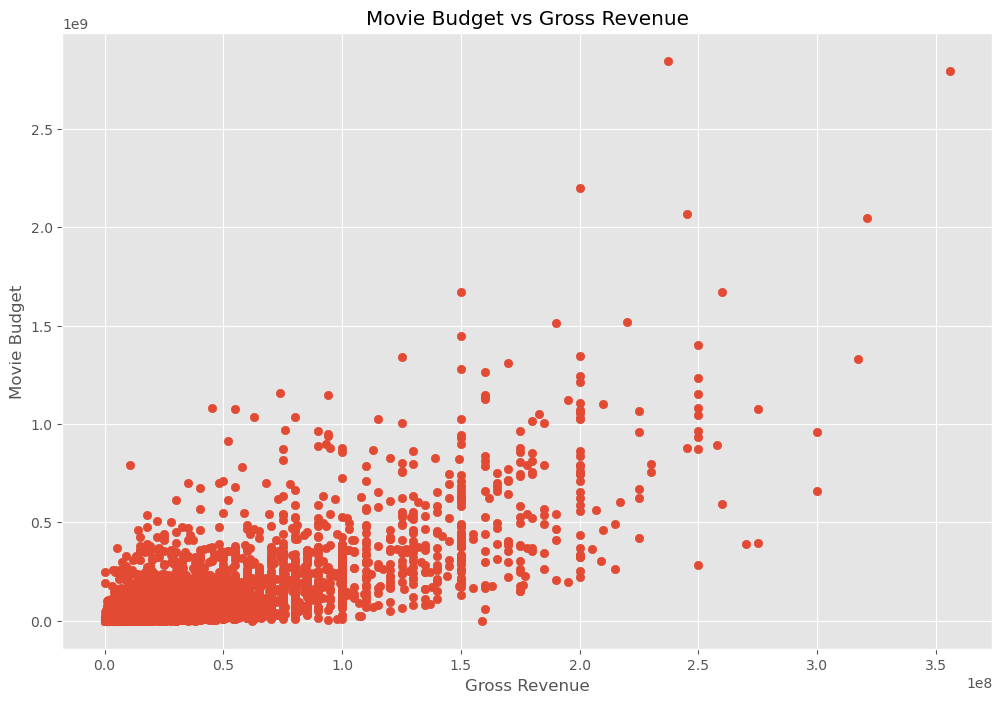

In [55]:
#Using matplotlib to plot budget vs Gross revenue and find if correlation exists

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Movie Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Budget')
plt.show

Text(0, 0.5, 'Movie Budget')

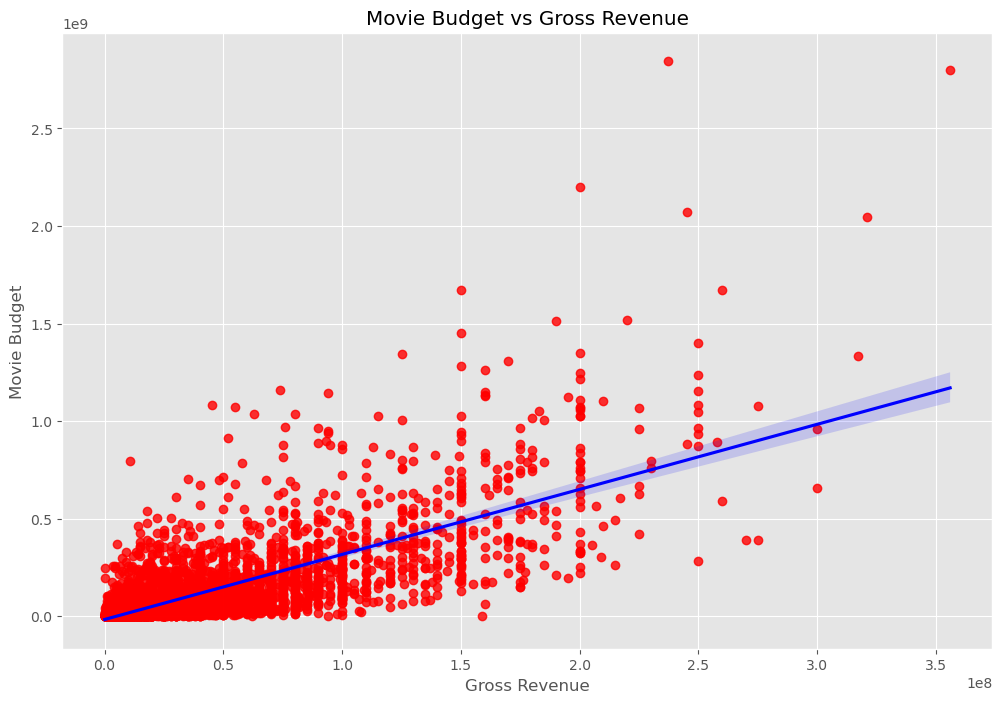

In [58]:
#While correlation is visible, it is not clear in the scatter plot
#Using Seaborn to create regression plot of budget vs Gross revenue to find if correlation exists

sns.regplot(x='budget',y='gross', data=df, 
            scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Movie Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Budget')


The Regression Line shows high positive correlation between movie budget and gross revenue. 

This proves that our first assumption was correct but we do not know the actual correlation coefficient and hence cannot determine the accurate degree of correlation. 

To find this we create a correlation matrix. We use spearman rank correlation method to find the correlation coefficient 

In [59]:
#Finding the actual correlation that exists 
df.corr(method='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000



From this correlation matrix, we can clearly see that there is a high correlation between budget of the movie and gross revenue as well as votes and gross revenue.


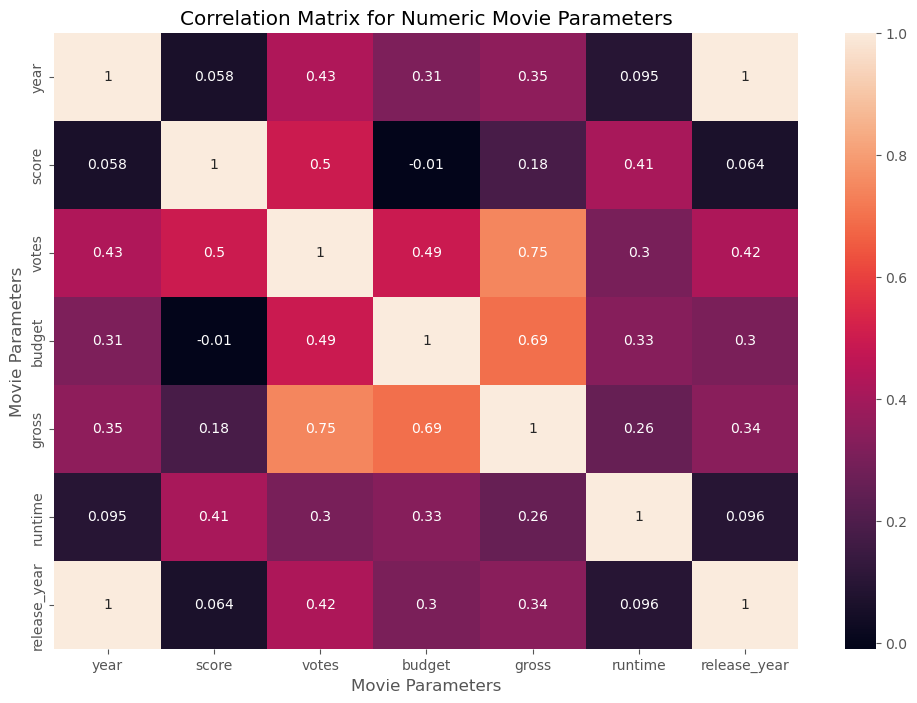

In [13]:
#Turning the correlation matrix into a heatmap to visualise it better

correlation_matrix= df.corr(method='spearman', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Movie Parameters')
plt.xlabel('Movie Parameters')
plt.ylabel('Movie Parameters')
plt.show()


There might exist correlation between text objects such as production company and gross revenue as well. It cannot be shown in this heatmap as it is not numeric data. 

To tackle this, we assign numeric index to production studios and then find correlation.


In [15]:
#numerizing the text objects
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes #random numerisation
        

In [16]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020


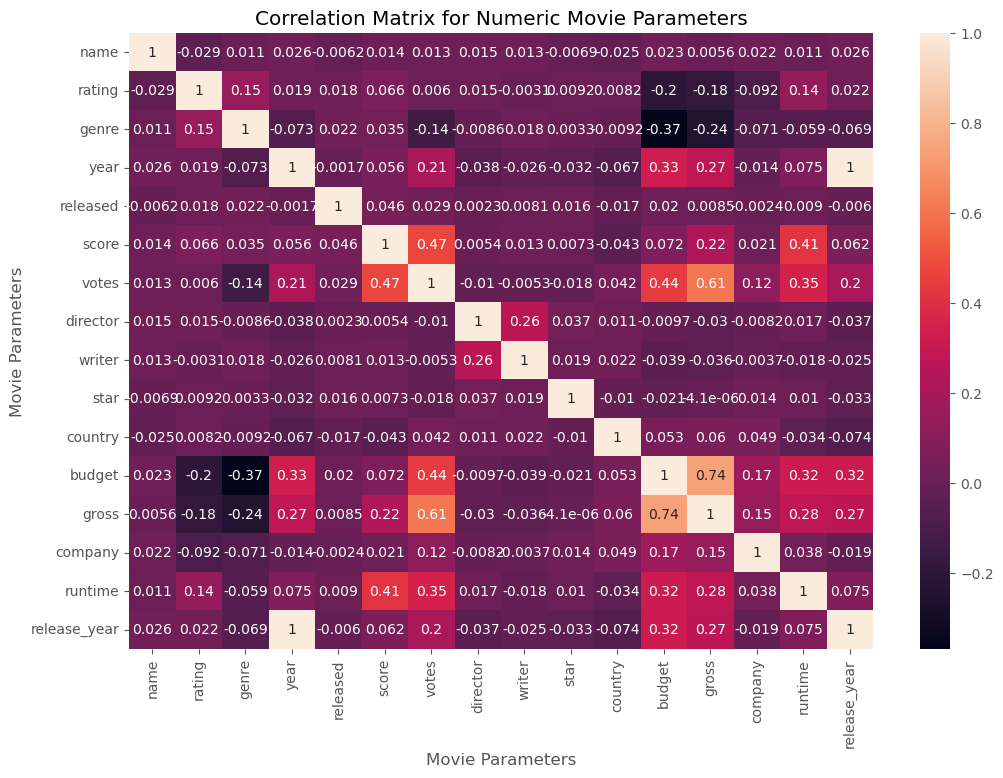

In [50]:
#Making a heatmap for correlation between all parameters (numeric and text)
correlation_matrix= df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Movie Parameters')
plt.xlabel('Movie Parameters')
plt.ylabel('Movie Parameters')
plt.show()

Using this heatmap, it is evident that very low correlation exists between the production company and the gross revenue of the movie. Hence, our second assumption was wrong.

From the correlation coefficients, we can conclude that-

1. Gross Revenue is highly correlated to Movie Budget and votes
This means that the higher the budget of the movie is, the more it will end up earning at the box office 
Also, the higher voted a movie is, the more it will earn at box office

2. Gross Revenue has Low Correlation with to Production company
This means that the bigger the production company the more high revenue earners it will have and vice versa
